In [ ]:
# -U: upgrade all
# -q: quite install

!apt-get install -yq graphviz graphviz-dev
!pip install -Uq pgmpy graphviz pygraphviz

# Question

> Adapted from Finn V. Jensen, "An Introduction to Bayesian Networks", Springer, 1996.

You must interpret a scene consisting of an image that shows a breakfast table for one person, and the task is to determine whether it is a continental or a British breakfast table.

British breakfast is usually composed of tea, bacon and eggs, and toast with marmalade (which is orange), while continental breakfast consists of coffee, boiled eggs, and rolls with strawberry jam (which is red).

Possible objects include a plate (usually big for British breakfast or small for continental breakfast), a cup (for tea or coffee), either a tea pot or a coffee pot, a jar (with either orange or red contents), and cutlery. We assume that a British breakfast always requires fork and knife, while a continental breakfast always requires spoon and knife.

Big plates are confused with small plates (and vice versa) with probability 0.1. Teacups may be taken for coffee cups with probability 0.3 and coffee cups for teacups with probability 0.2. Tea pots and coffee pots are confused with probability 0.4. The color of the contents of a jar is determined correctly in 95% of the cases. Knives are taken for spoons with probability 0.05 and for forks with probability 0.1. Spoons are never taken for knives, but for forks with probability 0.25. A fork is recognized as a spoon with probability 0.2, and as a knife with probability 0.1.
Cutlery never come in identical (e.g., two forks) pairs, and if there is a fork, then there is
also a knife on the table.
Six objects are identified on the table: a pot, a jar, a plate, a cup, two pieces of cutlery.
You may want to interpret “usual” as 99 out of 100.

Construct a model for interpretation of the scene. Draw a Bayesian network structure (with prior and CPTs) that can be interpreted causally.

In [ ]:
from IPython.display import Image
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD


# Causal (True) variables
# ----------------
#   BT         : breakfast type      {british , continental}
#   Plate_T    : true plate size     {big , small}
#   Pot_T      : true pot type       {tea , coffee}
#   Cup_T      : true cup type       {tea , coffee}
#   Jar_T      : true jam colour     {orange , red}
#   CutSet_T   : true cutlery pair   {fork-knife , spoon-knife}
#
# Observable nodes
# -------------------------
#   Plate_O , Pot_O , Cup_O , Jar_O
#   Cut_FS_O , Cut_K_O : the two recognised pieces of cutlery spoon or fork, and knife


edges = [
    ("BT", "Plate_T"),
    ("BT", "Pot_T"),
    ("BT", "Cup_T"),
    ("BT", "Jar_T"),
    ("BT", "CutSet_T"),

    ("Plate_T", "Plate_O"),
    ("Pot_T",   "Pot_O"),
    ("Cup_T",   "Cup_O"),
    ("Jar_T",   "Jar_O"),

    ("CutSet_T", "Cut_FS_O"),
    ("CutSet_T", "Cut_K_O")
]

model = DiscreteBayesianNetwork(edges)

print("Nodes:", sorted(model.nodes()))
print("Edges:", model.edges())


Nodes: ['BT', 'Cup_O', 'Cup_T', 'CutSet_T', 'Cut_FS_O', 'Cut_K_O', 'Jar_O', 'Jar_T', 'Plate_O', 'Plate_T', 'Pot_O', 'Pot_T']
Edges: [('BT', 'Plate_T'), ('BT', 'Pot_T'), ('BT', 'Cup_T'), ('BT', 'Jar_T'), ('BT', 'CutSet_T'), ('Plate_T', 'Plate_O'), ('Pot_T', 'Pot_O'), ('Cup_T', 'Cup_O'), ('Jar_T', 'Jar_O'), ('CutSet_T', 'Cut_FS_O'), ('CutSet_T', 'Cut_K_O')]


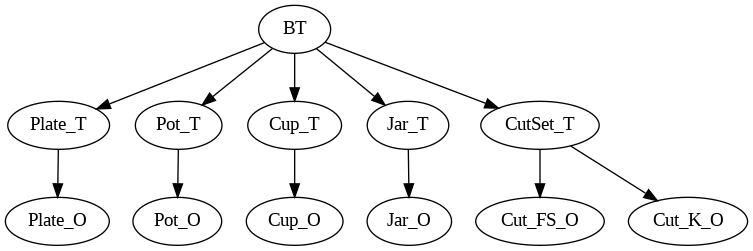

In [ ]:
viz = model.to_graphviz()
viz.draw("_.png", prog="dot") # neato, dot, twopi, circo, fdp, nop
Image("_.png")


In [ ]:
# ------------------------------------------------------------------
# 2.  STATE‑LISTS  (keep the same ordering everywhere)
# ------------------------------------------------------------------
BT_states     = ["british", "continental"]
plate_states  = ["big", "small"]
pot_states    = ["tea", "coffee"]
cup_states    = ["tea", "coffee"]
jar_states    = ["orange", "red"]
cutset_states = ["fork-knife", "spoon-knife"]
cut_obs       = ["fork", "knife", "spoon"]          # for Cut_FS_O , Cut_K_O

## True CPDs

In [ ]:
# ------------------------------------------------------------------
# 3.  PRIORS  +  TRUE‑OBJECT CPTs   (caused by BT)
# ------------------------------------------------------------------
# prior on breakfast type (50/50)
cpd_BT = TabularCPD(
    variable="BT",
    variable_card=2,
    values=[[0.5], [0.5]],
    state_names={"BT": BT_states}
)
print(cpd_BT)

+-----------------+-----+
| BT(british)     | 0.5 |
+-----------------+-----+
| BT(continental) | 0.5 |
+-----------------+-----+


In [ ]:
# Helper to build 99% tables quickly
def cpd_obj(var, states):
    m = [[0.99, 0.01],      # preferred   / BT=[british , continental]
         [0.01, 0.99]]      # other value
    return TabularCPD(
                variable=var,
                variable_card=2,
                values=m,
                evidence=["BT"],
                evidence_card=[2],
                state_names={var: states, "BT": BT_states})

In [ ]:
cpd_plate_T  = cpd_obj("Plate_T", plate_states)
print(cpd_plate_T, '\n')

cpd_pot_T    = cpd_obj("Pot_T",   pot_states)
print(cpd_pot_T, '\n')

cpd_cup_T    = cpd_obj("Cup_T",   cup_states)
print(cpd_cup_T, '\n')

cpd_jar_T    = cpd_obj("Jar_T",   jar_states)
print(cpd_jar_T, '\n')

+----------------+-------------+-----------------+
| BT             | BT(british) | BT(continental) |
+----------------+-------------+-----------------+
| Plate_T(big)   | 0.99        | 0.01            |
+----------------+-------------+-----------------+
| Plate_T(small) | 0.01        | 0.99            |
+----------------+-------------+-----------------+ 

+-------------------+-------------+-----------------+
| BT                | BT(british) | BT(continental) |
+-------------------+-------------+-----------------+
| Pot_T(tea_pot)    | 0.99        | 0.01            |
+-------------------+-------------+-----------------+
| Pot_T(coffee_pot) | 0.01        | 0.99            |
+-------------------+-------------+-----------------+ 

+-------------------+-------------+-----------------+
| BT                | BT(british) | BT(continental) |
+-------------------+-------------+-----------------+
| Cup_T(tea_cup)    | 0.99        | 0.01            |
+-------------------+-------------+----------

In [ ]:
# Cutlery pair: deterministic
cpd_cutset_T = TabularCPD(
    variable="CutSet_T",
    variable_card=2,
    values=[[1, 0],          # fork‑knife  (only for British)
            [0, 1]],         # spoon‑knife (only for Continental)
    evidence=["BT"],
    evidence_card=[2],
    state_names={"CutSet_T": cutset_states, "BT": BT_states}
)
print(cpd_cutset_T)

+-----------------------+-------------+-----------------+
| BT                    | BT(british) | BT(continental) |
+-----------------------+-------------+-----------------+
| CutSet_T(fork-knife)  | 1.0         | 0.0             |
+-----------------------+-------------+-----------------+
| CutSet_T(spoon-knife) | 0.0         | 1.0             |
+-----------------------+-------------+-----------------+


## Observed CPDs

In [ ]:
# ------------------------------------------------------------------
# 4.  SENSOR / VISION CONFUSION CPTs
# ------------------------------------------------------------------
# plates: big/small confusion 0.10 each way
cpd_plate_O = TabularCPD(
    "Plate_O", 2,
    [[0.9, 0.1],
     [0.1, 0.9]],
    evidence=["Plate_T"],
    evidence_card=[2],
    state_names={"Plate_O": plate_states, "Plate_T": plate_states}
)
print(cpd_plate_O)

+----------------+--------------+----------------+
| Plate_T        | Plate_T(big) | Plate_T(small) |
+----------------+--------------+----------------+
| Plate_O(big)   | 0.9          | 0.1            |
+----------------+--------------+----------------+
| Plate_O(small) | 0.1          | 0.9            |
+----------------+--------------+----------------+


In [ ]:
# pots: tea/coffee confusion 0.4 each way
cpd_pot_O = TabularCPD(
    "Pot_O", 2,
    [[0.6, 0.4],
     [0.4, 0.6]],
    evidence=["Pot_T"],
    evidence_card=[2],
    state_names={"Pot_O": pot_states, "Pot_T": pot_states}
)
print(cpd_pot_O)

+-------------------+----------------+-------------------+
| Pot_T             | Pot_T(tea_pot) | Pot_T(coffee_pot) |
+-------------------+----------------+-------------------+
| Pot_O(tea_pot)    | 0.6            | 0.4               |
+-------------------+----------------+-------------------+
| Pot_O(coffee_pot) | 0.4            | 0.6               |
+-------------------+----------------+-------------------+


In [ ]:
# cups: tea seen as coffee 0.3 ; reverse error 0.2
cpd_cup_O = TabularCPD(
    "Cup_O", 2,
    [[0.7, 0.2],
     [0.3, 0.8]],
    evidence=["Cup_T"],
    evidence_card=[2],
    state_names={"Cup_O": cup_states, "Cup_T": cup_states}
)
print(cpd_cup_O)

+-------------------+----------------+-------------------+
| Cup_T             | Cup_T(tea_cup) | Cup_T(coffee_cup) |
+-------------------+----------------+-------------------+
| Cup_O(tea_cup)    | 0.7            | 0.2               |
+-------------------+----------------+-------------------+
| Cup_O(coffee_cup) | 0.3            | 0.8               |
+-------------------+----------------+-------------------+


In [ ]:
# jam colour: 95 % accurate
cpd_jar_O = TabularCPD(
    "Jar_O", 2,
    [[0.95, 0.05],
     [0.05, 0.95]],
    evidence=["Jar_T"],
    evidence_card=[2],
    state_names={"Jar_O": jar_states, "Jar_T": jar_states}
)
print(cpd_jar_O)

+---------------+---------------+------------+
| Jar_T         | Jar_T(orange) | Jar_T(red) |
+---------------+---------------+------------+
| Jar_O(orange) | 0.95          | 0.05       |
+---------------+---------------+------------+
| Jar_O(red)    | 0.05          | 0.95       |
+---------------+---------------+------------+


The vision system always outputs two individual detections.
We model those as two observable nodes each of which can be recognised as fork, knife, or spoon.
What differs is which true utensil they correspond to once you know the
pair.

All the “never two identical pieces, fork ⇒ knife present” logic is packed into the single latent variable CutSet_T; the two observation nodes then inherit ordinary, reusable confusion probabilities.


## Option 1: Deterministic Mapping (our implementation)

To keep the network simple and small, we fixed the order.

- **`Cut_FS_O` Column 1** (when `CutSet_T = fork‑knife`) is trying to recognise a fork;

- **`Cut_FS_O` Column 2** (when `CutSet_T = spoon‑knife`) is trying to recognise a spoon;

- while **both columns** of **`Cut_K_O`** are always a knife.


## Option 2: Stochastic Mapping
If we wanted the order on the table to be random we would add another hidden node to choose which utensil is first.
Either introduce another hidden switch or use a symmetric representation with a single unordered multiset variable.


In [ ]:
# We map each cutlery‑pair state to the two real utensils deterministically
# Cut_FS_O , Cut_K_O

cpd_cut_FS_O = TabularCPD(
    "Cut_FS_O", 3,
    values=[
      # [fork, spoon]
        [0.7, 0.25],
        [0.1, 0],
        [0.2, 0.75]
    ],
    evidence=["CutSet_T"],
    evidence_card=[2],
    state_names={"Cut_FS_O": cut_obs, "CutSet_T": cutset_states}
)
print(cpd_cut_FS_O)
print()

cpd_cut_K_O = TabularCPD(
    "Cut_K_O", 3,
    values=[
        [0.1, 0.1],
        [0.85, 0.85],
        [0.05, 0.05]
    ],
    evidence=["CutSet_T"],
    evidence_card=[2],
    state_names={"Cut_K_O": cut_obs, "CutSet_T": cutset_states}
)
print(cpd_cut_K_O)

+-----------------+----------------------+-----------------------+
| CutSet_T        | CutSet_T(fork-knife) | CutSet_T(spoon-knife) |
+-----------------+----------------------+-----------------------+
| Cut_FS_O(fork)  | 0.7                  | 0.25                  |
+-----------------+----------------------+-----------------------+
| Cut_FS_O(knife) | 0.1                  | 0.0                   |
+-----------------+----------------------+-----------------------+
| Cut_FS_O(spoon) | 0.2                  | 0.75                  |
+-----------------+----------------------+-----------------------+

+----------------+----------------------+-----------------------+
| CutSet_T       | CutSet_T(fork-knife) | CutSet_T(spoon-knife) |
+----------------+----------------------+-----------------------+
| Cut_K_O(fork)  | 0.1                  | 0.1                   |
+----------------+----------------------+-----------------------+
| Cut_K_O(knife) | 0.85                 | 0.85                  |


In [ ]:
# ------------------------------------------------------------------
# 5.  ADD CPDs & VALIDATE
# ------------------------------------------------------------------
model.add_cpds(
    cpd_BT,
    cpd_plate_T, cpd_pot_T, cpd_cup_T, cpd_jar_T, cpd_cutset_T,
    cpd_plate_O, cpd_pot_O, cpd_cup_O, cpd_jar_O,
    cpd_cut_FS_O, cpd_cut_K_O
)

model.check_model()

True